In [2]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import glob

FONTSIZE=18

plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=FONTSIZE

# Linear Results

In [9]:
fp=open('./results_linear/ConvGan_linear_Gstrides_12_2_Dstrides_12_2_results_e150.pkl','rb')
results=pickle.load(fp)
fp.close()

In [10]:
print(results.keys())

dict_keys(['args', 'd_loss', 'g_loss', 'acc_real', 'acc_fake', 'epoch', 'fname_base'])


Text(0, 0.5, 'Loss')

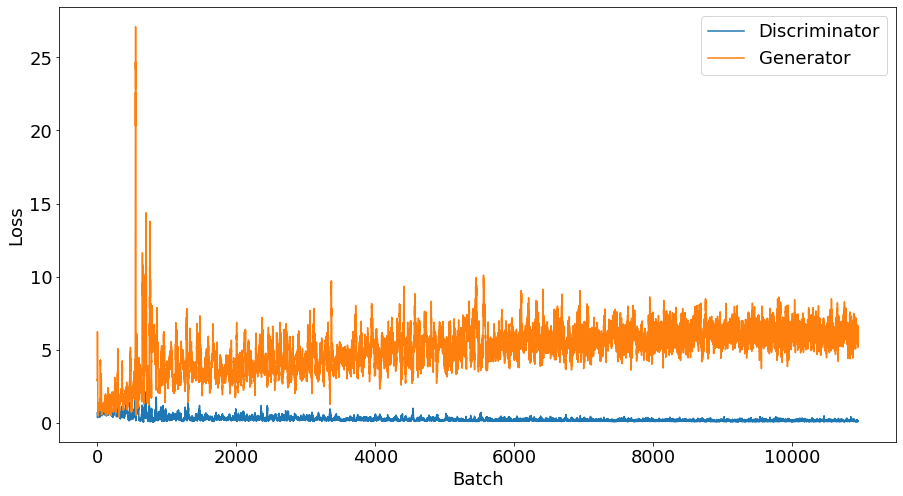

In [11]:
gen_boost_factor=2
d_batches=np.arange(len(results['d_loss']))
g_batches=np.arange(len(results['g_loss']))
g_batches=g_batches/2
plt.plot(d_batches,results['d_loss'],label='Discriminator')
plt.plot(g_batches,results['g_loss'],label='Generator')
plt.legend(loc='best')
plt.xlabel('Batch')
plt.ylabel('Loss')

# Fifths Results

In [7]:
fp=open('./results_fifths/ConvGan_fifths_Gstrides_12_2_Dstrides_12_2_results_e150.pkl','rb')
results=pickle.load(fp)
fp.close()

Text(0, 0.5, 'Loss')

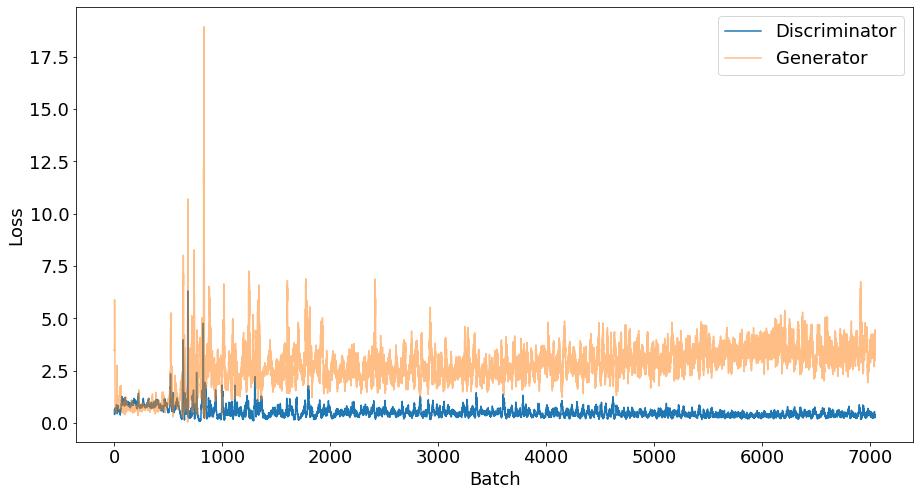

In [8]:
gen_boost_factor=3
d_batches=np.arange(len(results['d_loss']))
g_batches=np.arange(len(results['g_loss']))
g_batches=g_batches/gen_boost_factor
plt.plot(d_batches,results['d_loss'],label='Discriminator')
plt.plot(g_batches,results['g_loss'],label='Generator',alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Batch')
plt.ylabel('Loss')

# These are additional epochs trained on the fifths model

-gen_boost_factor=4

In [3]:
fp=open('./results_fifths2/ConvGan_fifths_Gstrides_12_2_Dstrides_12_2_results_e100.pkl','rb')
results=pickle.load(fp)
fp.close()

Text(0, 0.5, 'Loss')

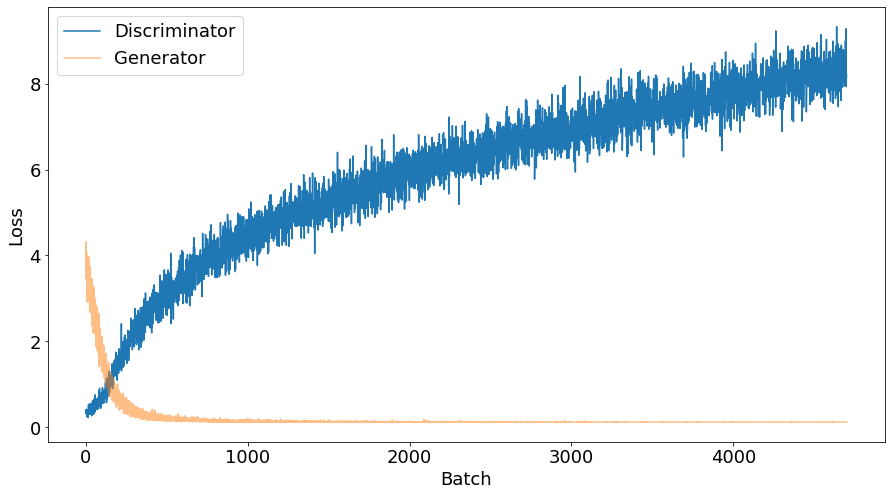

In [4]:
gen_boost_factor=4
d_batches=np.arange(len(results['d_loss']))
g_batches=np.arange(len(results['g_loss']))
g_batches=g_batches/gen_boost_factor
plt.plot(d_batches,results['d_loss'],label='Discriminator')
plt.plot(g_batches,results['g_loss'],label='Generator',alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Batch')
plt.ylabel('Loss')

# Here's a new fifths model with a generator feature space of 32 and disc filters 32 32
-gen_boost_factor=4

In [5]:
fp=open('./results_fifths_smaller/ConvGan_fifths_gen_feature_32_disc_filters_32_32_Gstrides_12_2_Dstrides_12_2_results_e250.pkl','rb')
results=pickle.load(fp)
fp.close()

Text(0, 0.5, 'Loss')

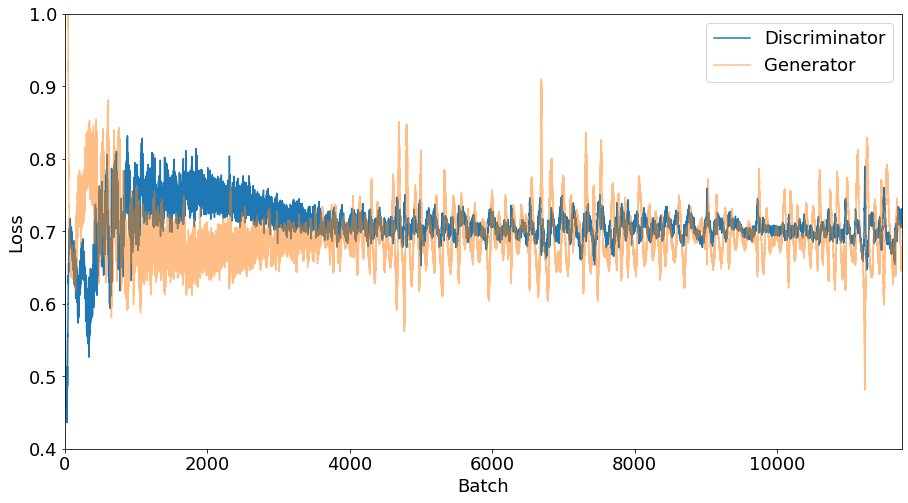

In [8]:
gen_boost_factor=4
d_batches=np.arange(len(results['d_loss']))
g_batches=np.arange(len(results['g_loss']))
g_batches=g_batches/gen_boost_factor
plt.axis([0,max(d_batches),0.4,1])
plt.plot(d_batches,results['d_loss'],label='Discriminator')
plt.plot(g_batches,results['g_loss'],label='Generator',alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Batch')
plt.ylabel('Loss')

# here's a continuation of that model

In [3]:
fp=open('./results_fifths_smaller2/ConvGan_fifths_gen_feature_32_disc_filters_32_32_Gstrides_12_2_Dstrides_12_2_results_e750.pkl','rb')
results=pickle.load(fp)
fp.close()

Text(0, 0.5, 'Loss')

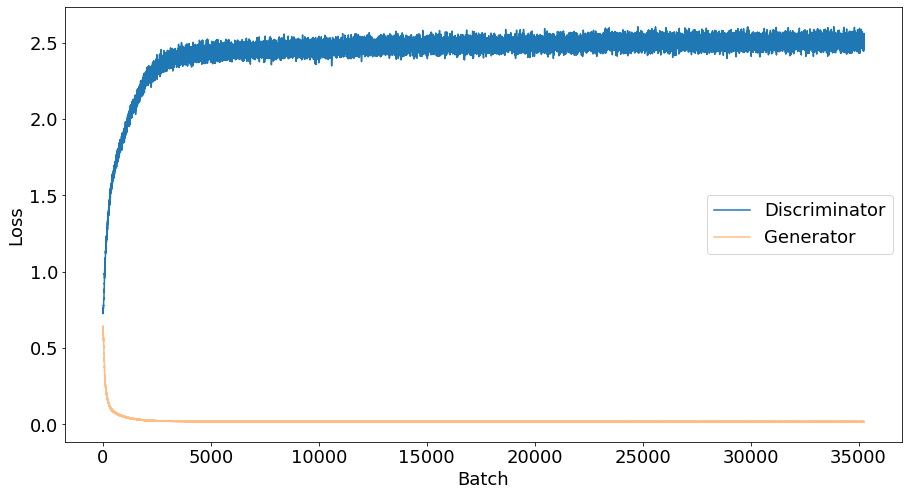

In [5]:
gen_boost_factor=4
d_batches=np.arange(len(results['d_loss']))
g_batches=np.arange(len(results['g_loss']))
g_batches=g_batches/gen_boost_factor
#plt.axis([0,max(d_batches),0.4,1])
plt.plot(d_batches,results['d_loss'],label='Discriminator')
plt.plot(g_batches,results['g_loss'],label='Generator',alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Batch')
plt.ylabel('Loss')

# A new run with updating boost factors each batch depending on the gen and disc loss

# There was a bug in the code so it didn't work for the first run, this run just has boost factors of 1 for both gen and disc

In [3]:
fp=open('./results_fifths_smaller_bug/ConvGan_fifths_gen_feature_32_disc_filters_32_32_Gstrides_12_2_Dstrides_12_2_results_e750.pkl','rb')
results=pickle.load(fp)
fp.close()

In [4]:
print(results['d_loss'][0])

[0, 0.5757183]


In [5]:
print(len(results['d_loss']))
print(len(results['g_loss']))

35250
35250


In [6]:
dx=[]
dy=[]
for i in results['d_loss']:
    dx.append(i[0])
    dy.append(i[1])
    
gx=[]
gy=[]
for i in results['g_loss']:
    gx.append(i[0])
    gy.append(i[1])

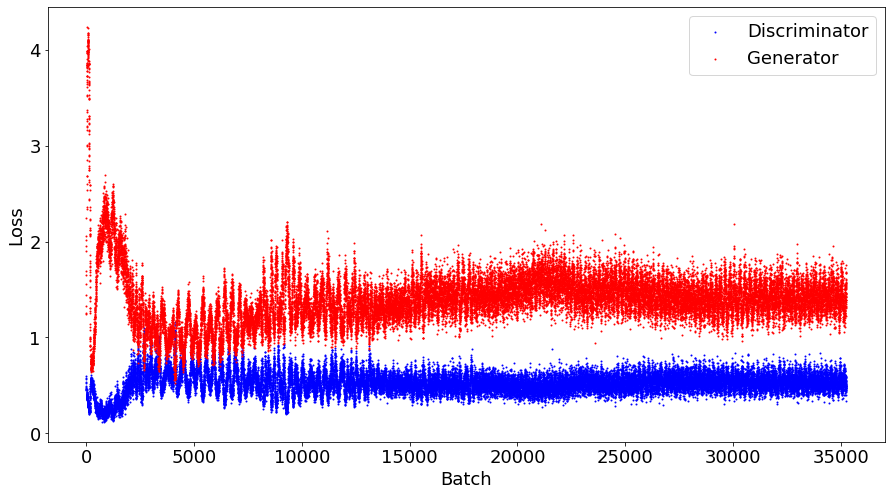

In [7]:
plt.scatter(dx,dy,s=1,color='b',label='Discriminator')
plt.scatter(gx,gy,s=1,color='r',label='Generator')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [8]:
g_len=len(results['g_loss'])
g_idxs=np.arange(g_len-10,g_len,step=1,dtype=np.int32)
g_loss_avg=np.average([results['g_loss'][i][1] for i in g_idxs])
print(g_loss_avg)

1.4378833


In [9]:
d_len=len(results['d_loss'])
d_idxs=np.arange(d_len-10,d_len,step=1,dtype=np.int32)
d_loss_avg=np.average([results['d_loss'][i][1] for i in d_idxs])
print(d_loss_avg)

0.48101774


In [11]:
if g_loss_avg>d_loss_avg:
    #discriminator is winning
    disc_boost=int(1)

    if d_loss_avg<=0.1: #prevent huge boost values when one loss zeros out
        gen_boost=int(10)
    elif d_loss_avg>0.1:
        gen_boost=int(np.round(g_loss_avg/d_loss_avg,decimals=0))
elif d_loss_avg>g_loss_avg:
    #generator is winning
    gen_boost=int(1)

    if g_loss_avg<=0.1: #prevent huge boost values when one loss zeros out
        disc_boost=int(10)
    elif g_loss_avg>0.1:
        disc_boost=int(np.round(d_loss_avg/g_loss_avg,decimals=0))
        
print(disc_boost)
print(gen_boost)

1
3


# Now the run that hopefully correctly uses the updating boosts

In [4]:
fp=open('./results_fifths_smaller_boost/ConvGan_fifths_gen_feature_32_disc_filters_32_32_Gstrides_12_2_Dstrides_12_2_results_e750.pkl','rb')
results=pickle.load(fp)
fp.close()

In [5]:
print(results.keys())

dict_keys(['args', 'disc_boost', 'gen_boost', 'd_loss', 'g_loss', 'acc_real', 'acc_fake', 'epoch', 'fname_base'])


In [6]:
print(results['disc_boost'][-100:])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [7]:
print(results['gen_boost'][-100:])
#sweet this one actually worked

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


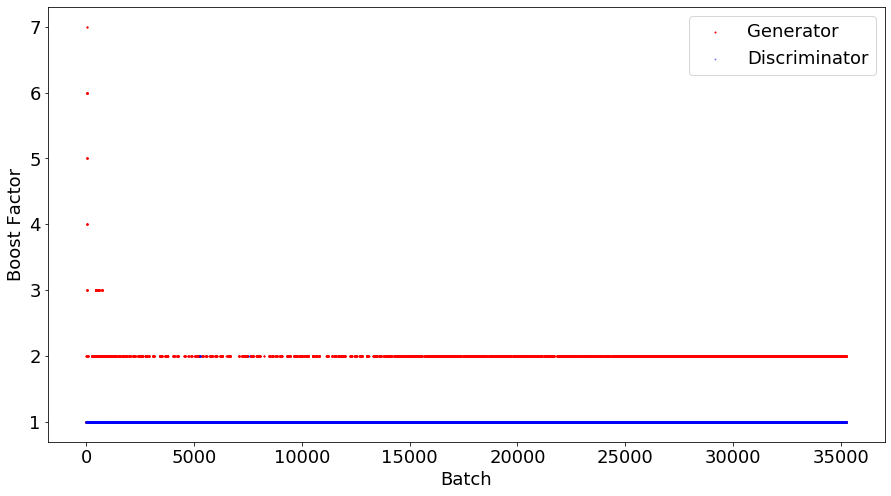

In [18]:
batches=np.arange(len(results['gen_boost']))
plt.scatter(batches,results['gen_boost'],s=1,c='r',label='Generator')
plt.scatter(batches,results['disc_boost'],s=1,alpha=0.4,c='b',label='Discriminator')
plt.xlabel('Batch')
plt.ylabel('Boost Factor')
plt.legend(loc='best')
plt.savefig('./presentation/boost_factor.png',bbox_inches='tight')

In [8]:
print(len(results['d_loss']))
print(results['d_loss'][0])

35260
[0, 0.75985664]


In [9]:
dx=[]
dy=[]
for i in results['d_loss']:
    dx.append(i[0])
    dy.append(i[1])
gx=[]
gy=[]
for i in results['g_loss']:
    gx.append(i[0])
    gy.append(i[1])
    

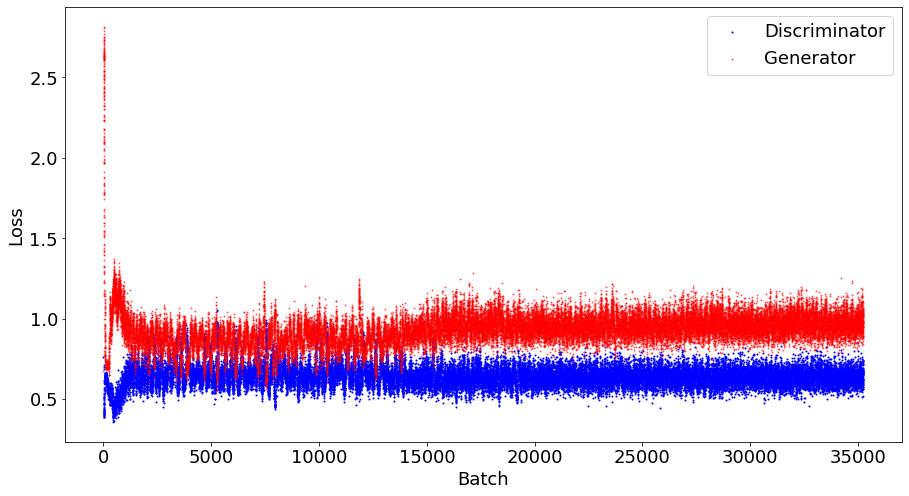

In [11]:
plt.scatter(dx,dy,s=1,color='b',label='Discriminator')
plt.scatter(gx,gy,s=1,color='r',alpha=0.5,label='Generator')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('./presentation/loss.png',bbox_inches='tight')

# Next 750 epochs for that same run

In [3]:
fp=open('./results_fifths_smaller_boost2/ConvGan_fifths_gen_feature_32_disc_filters_32_32_Gstrides_12_2_Dstrides_12_2_results_e750.pkl','rb')
results=pickle.load(fp)
fp.close()

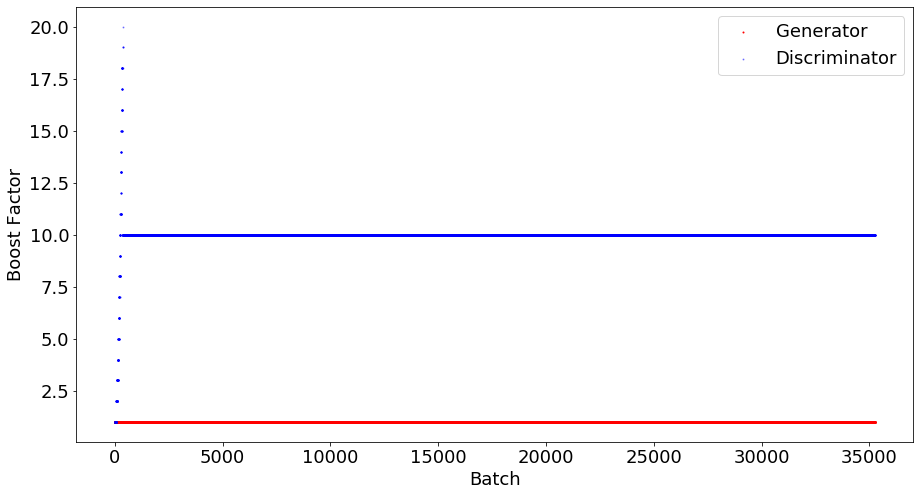

In [4]:
batches=np.arange(len(results['gen_boost']))
plt.scatter(batches,results['gen_boost'],s=1,c='r',label='Generator')
plt.scatter(batches,results['disc_boost'],s=1,alpha=0.4,c='b',label='Discriminator')
plt.xlabel('Batch')
plt.ylabel('Boost Factor')
plt.legend(loc='best')
#plt.savefig('./presentation/boost_factor.png',bbox_inches='tight')

In [5]:
dx=[]
dy=[]
for i in results['d_loss']:
    dx.append(i[0])
    dy.append(i[1])
gx=[]
gy=[]
for i in results['g_loss']:
    gx.append(i[0])
    gy.append(i[1])

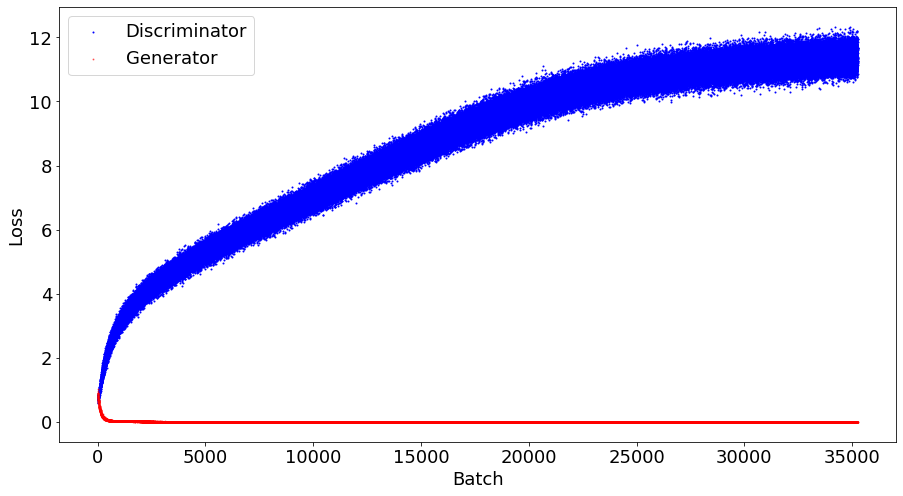

In [7]:
plt.scatter(dx,dy,s=1,color='b',label='Discriminator')
plt.scatter(gx,gy,s=1,color='r',alpha=0.5,label='Generator')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('./presentation/exploding_loss.png',bbox_inches='tight')

# Nonsquare

In [3]:
fp=open('./results_nonsquare/ConvGan_fifths_gen_feature_32_disc_filters_32_32_16_Gstrides_12_2_Dstrides_1_1_1_results_e250.pkl','rb')
results=pickle.load(fp)
fp.close()

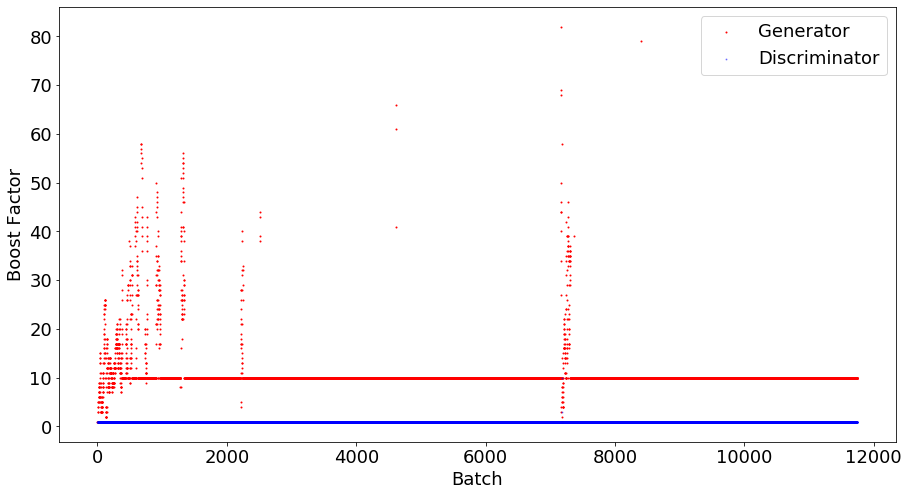

In [4]:
batches=np.arange(len(results['gen_boost']))
plt.scatter(batches,results['gen_boost'],s=1,c='r',label='Generator')
plt.scatter(batches,results['disc_boost'],s=1,alpha=0.4,c='b',label='Discriminator')
plt.xlabel('Batch')
plt.ylabel('Boost Factor')
plt.legend(loc='best')
#plt.savefig('./presentation/boost_factor.png',bbox_inches='tight')

In [5]:
dx=[]
dy=[]
for i in results['d_loss']:
    dx.append(i[0])
    dy.append(i[1])
gx=[]
gy=[]
for i in results['g_loss']:
    gx.append(i[0])
    gy.append(i[1])

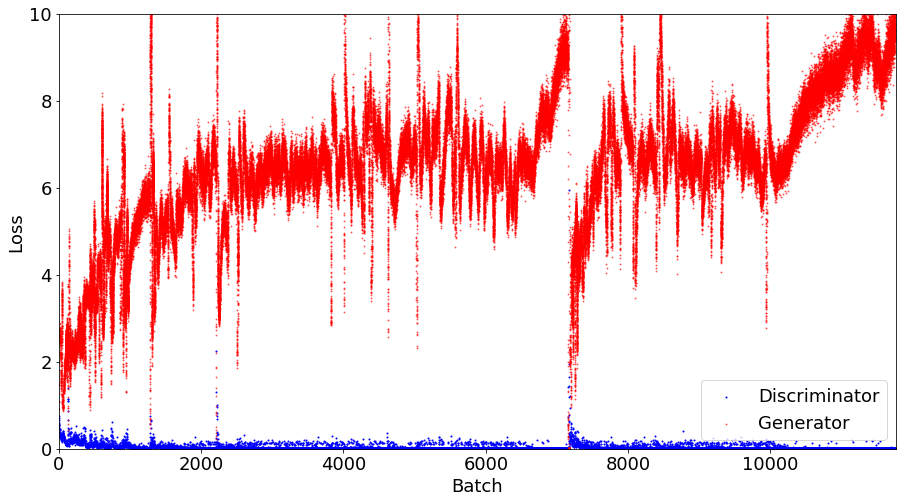

In [7]:
plt.axis([0,len(dx),0,10])
plt.scatter(dx,dy,s=1,color='b',label='Discriminator')
plt.scatter(gx,gy,s=1,color='r',alpha=0.5,label='Generator')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend(loc='best')
#plt.savefig('./presentation/exploding_loss.png',bbox_inches='tight')

# Ok I'm going to be more clear now in what the architecture is

# This run has

- updating boost factor
- disc architecture conv 64 64 w/ strides (2,2), (2,2) w/ kernels (3,3), (3,3)
- generator feature space 64
- gen starting shape (4,12)
- gen strides (12,2), (2,4)
- gen kernels (3,3), (3,3)
- gen latent dim 10

In [2]:
fp=open('./results_nonsquare2/ConvGan_fifths_gen_feature_64_disc_filters_64_64_Gstrides_12_2_Dstrides_2_2_results_e050.pkl','rb')
results=pickle.load(fp)
fp.close()

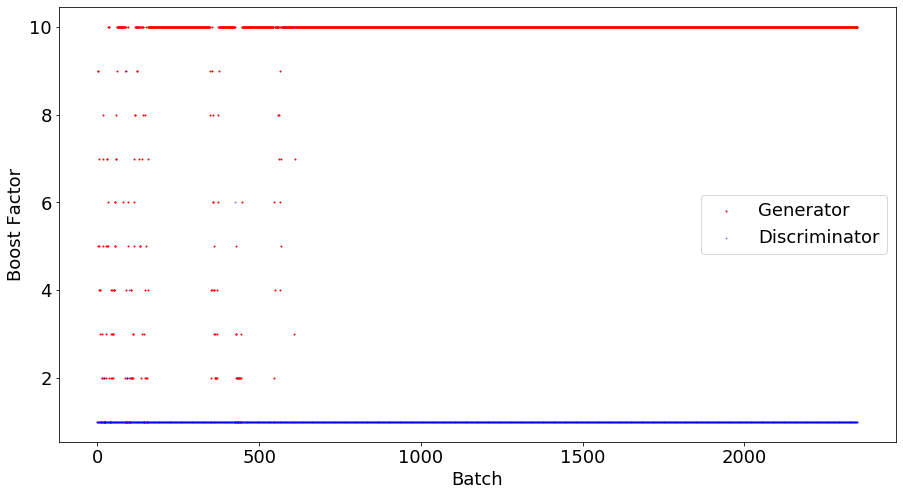

In [5]:
batches=np.arange(len(results['gen_boost']))
plt.scatter(batches,results['gen_boost'],s=1,c='r',label='Generator')
plt.scatter(batches,results['disc_boost'],s=1,alpha=0.4,c='b',label='Discriminator')
plt.xlabel('Batch')
plt.ylabel('Boost Factor')
plt.legend(loc='best')
#plt.savefig('./presentation/boost_factor.png',bbox_inches='tight')

In [6]:
dx=[]
dy=[]
for i in results['d_loss']:
    dx.append(i[0])
    dy.append(i[1])
gx=[]
gy=[]
for i in results['g_loss']:
    gx.append(i[0])
    gy.append(i[1])

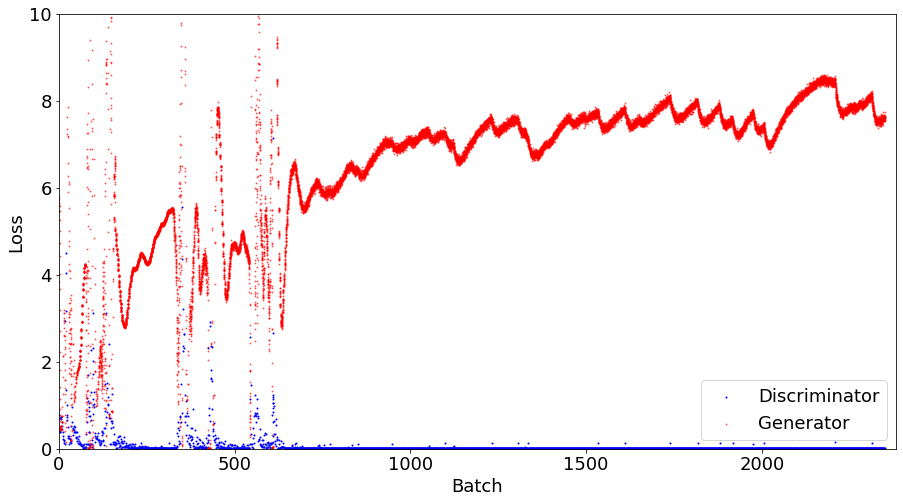

In [7]:
plt.axis([0,len(dx),0,10])
plt.scatter(dx,dy,s=1,color='b',label='Discriminator')
plt.scatter(gx,gy,s=1,color='r',alpha=0.5,label='Generator')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend(loc='best')
#plt.savefig('./presentation/exploding_loss.png',bbox_inches='tight')

# This one now has kernels which are factors of the strides

- updating boost factor
- disc architecture conv 64 64 w/ strides (2,2), (2,2) w/ kernels (4,4), (4,4)
- generator feature space 64
- gen starting shape (4,12)
- gen strides (12,2), (2,4)
- gen kernels (12,2), (2,4)
- gen latent dim 10

In [3]:
fp=open('./results_nonsquare3/ConvGan_fifths_gen_feature_64_disc_filters_64_64_Gstrides_12_2_Dstrides_2_2_results_e150.pkl','rb')
results=pickle.load(fp)
fp.close()

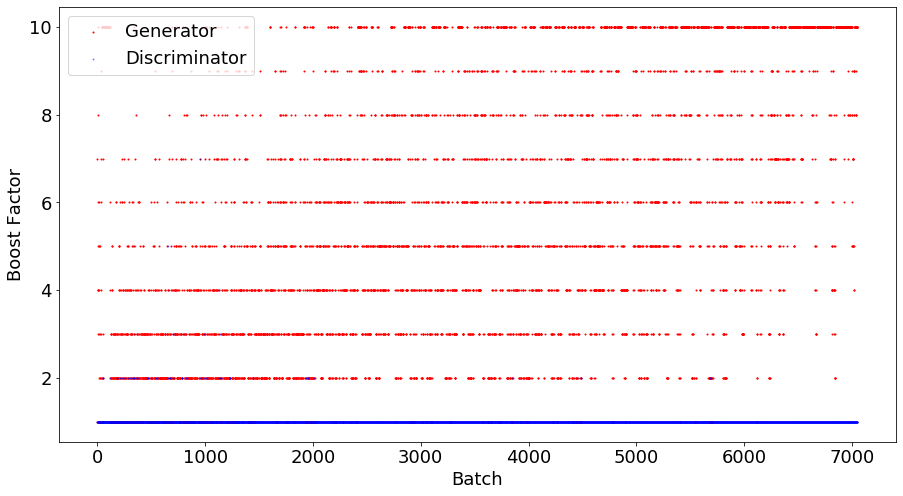

In [4]:
batches=np.arange(len(results['gen_boost']))
plt.scatter(batches,results['gen_boost'],s=1,c='r',label='Generator')
plt.scatter(batches,results['disc_boost'],s=1,alpha=0.4,c='b',label='Discriminator')
plt.xlabel('Batch')
plt.ylabel('Boost Factor')
plt.legend(loc='best')

In [5]:
dx=[]
dy=[]
for i in results['d_loss']:
    dx.append(i[0])
    dy.append(i[1])
gx=[]
gy=[]
for i in results['g_loss']:
    gx.append(i[0])
    gy.append(i[1])

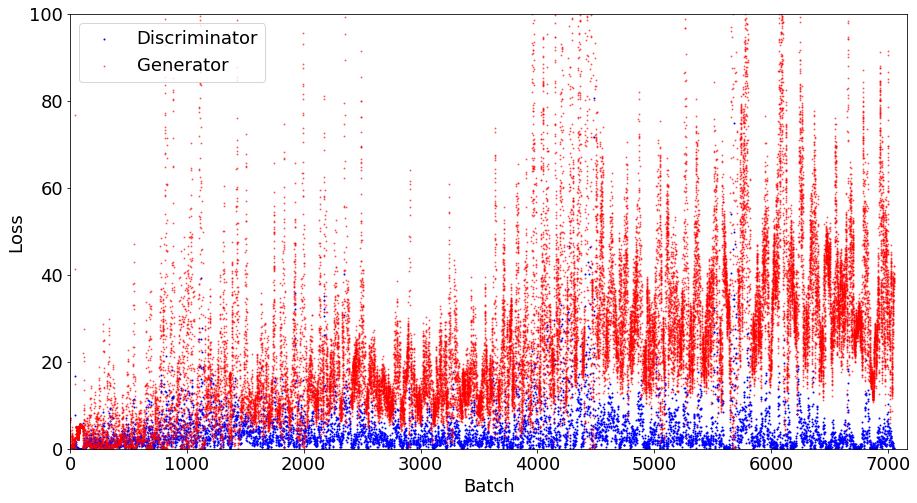

In [8]:
plt.axis([0,len(dx),0,100])
plt.scatter(dx,dy,s=1,color='b',label='Discriminator')
plt.scatter(gx,gy,s=1,color='r',alpha=0.5,label='Generator')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend(loc='best')